In [223]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
import joblib 

file_path =r"Prediction_data.xlsx"
sheet_name = 'vw_ChurnData'

data = pd.read_excel(file_path, sheet_name=sheet_name)
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


# Data Preprocessing

In [225]:
data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1 , inplace =True)

In [227]:
# Label Encoding (Label Encoding creates ordinal relationships between categories since in random forest, it does not consider the relationship We can use it, but we cannot use it in Linear Regression model)

columns_to_encode =  [
    'Gender',	'Married',	'State',	'Value_Deal',	'Phone_Service',
    'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan',  'Premium_Support', 
    'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method']

label_encoders = {}
for column in columns_to_encode:  
    label_encoders[column] = LabelEncoder() 
    data[column] = label_encoders[column].fit_transform(data[column])

In [211]:
data.sample(10)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Multiple_Lines,Internet_Service,Internet_Type,...,Streaming_Music,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
1758,0,34,0,17,12,19,1,1,0,3,...,0,2,0,1,25.500000,1121.050049,0,1904.400024,3025.449951,Stayed
3341,0,46,1,9,3,33,4,0,0,3,...,0,0,0,2,19.650000,19.650000,0,17.250000,36.900002,Churned
815,1,55,1,5,5,21,4,0,1,2,...,0,0,1,0,71.000000,71.000000,0,18.840000,89.839996,Churned
5244,0,48,1,9,11,26,5,0,1,2,...,0,0,1,1,69.949997,1205.500000,0,438.880005,1644.380005,Stayed
1189,1,34,0,5,12,5,5,0,1,1,...,1,0,1,0,-3.000000,712.250000,0,177.539993,889.789978,Stayed
4020,0,48,0,0,7,32,5,0,1,1,...,0,0,0,0,50.250000,593.750000,120,558.960022,1272.709961,Churned
3919,0,52,1,0,6,17,1,1,1,2,...,0,0,1,0,100.550003,6215.350098,0,565.739990,6781.089844,Churned
1594,0,39,1,15,6,31,5,1,1,2,...,1,0,1,0,100.000000,3320.600098,0,546.809998,3867.409912,Stayed
5318,1,58,0,17,7,6,5,1,0,3,...,0,2,1,1,25.299999,1672.349976,0,2544.300049,4216.649902,Stayed
2513,1,51,1,15,15,14,5,0,1,0,...,0,1,1,0,61.599998,1611.000000,0,161.250000,1727.349976,Stayed


In [229]:
# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

In [235]:
y_pred = rf_model.predict(X_test)

In [237]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, recall_score

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred, pos_label=1))

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202

0.8419301164725458
Recall (Sensitivity): 0.6450704225352113


In [116]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]


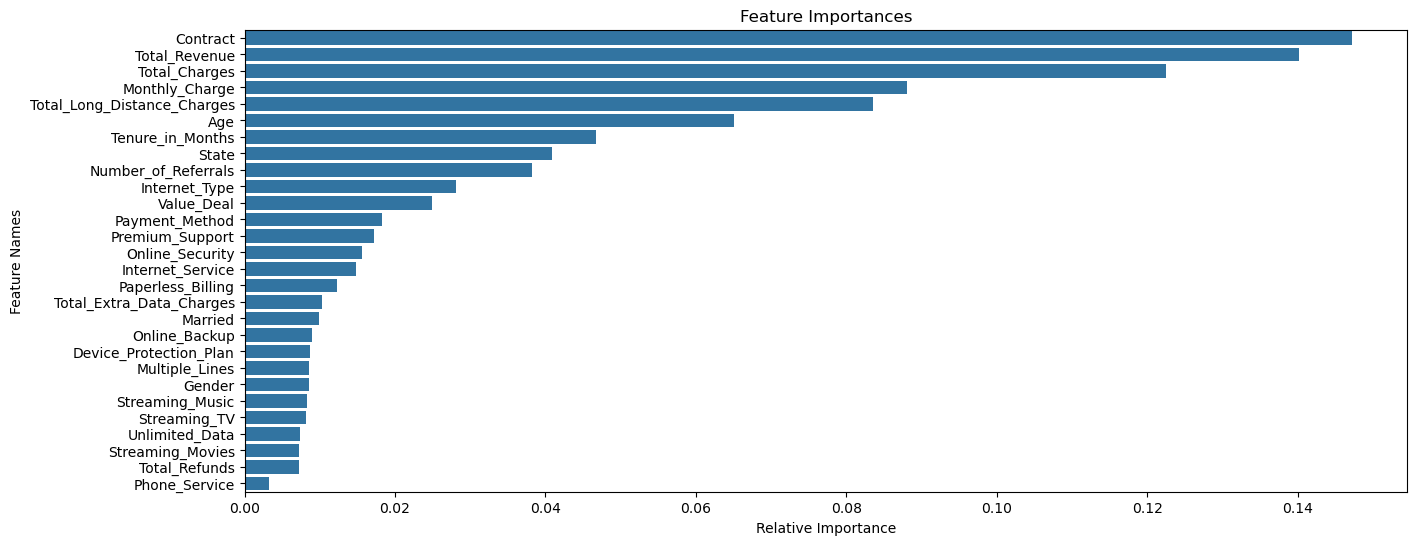

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [176]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(recall_score(y_test, y_pred, pos_label=1))

0.7537437603993344
[[637 210]
 [ 86 269]]
0.6450704225352113


In [174]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train, y_train)
y_pred3 = lrc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(recall_score(y_test, y_pred, pos_label=1))

0.7920133111480865
[[723 124]
 [126 229]]
0.6450704225352113


In [178]:
# Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV

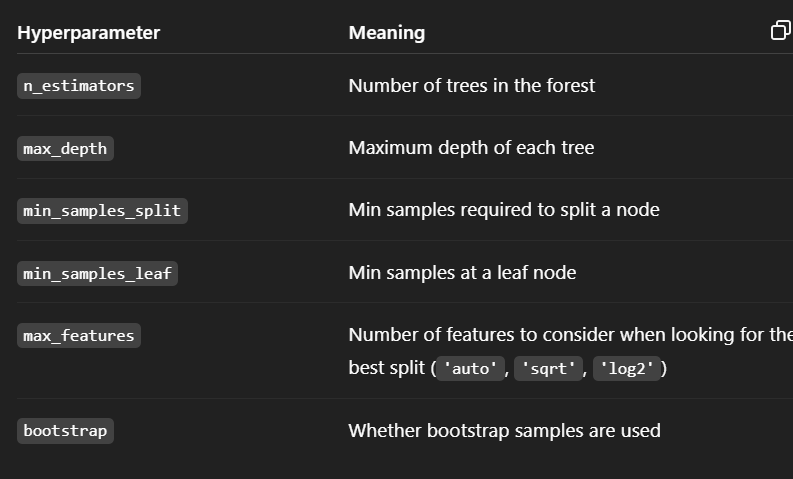

In [183]:
from sklearn.model_selection import RandomizedSearchCV

In [185]:
param_grid = {
    'n_estimators': [50, 100, 301],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [189]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 301]},
                   random_state=42, verbose=2)

In [ ]:
print("Best parameters:", random_search.best_params_)

In [195]:
best_rf = random_search.best_estimator_
y_pred4 = best_rf.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       847
           1       0.78      0.63      0.70       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.79      1202
weighted avg       0.83      0.84      0.83      1202



In [197]:
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(recall_score(y_test, y_pred4, pos_label=1))

0.8377703826955075
[[784  63]
 [132 223]]
0.6281690140845071


 # Use Model for Prediction on New Data

In [239]:
# Define the path to the Joiner Data Excel file
file_path = r"Prediction_data.xlsx"

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

In [241]:
# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)


# Display the first few rows of the fetched data

new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others


In [243]:
# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()


# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

In [245]:
# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)


In [247]:
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])


In [249]:
# Make predictions

new_predictions = rf_model.predict(new_data)


# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

In [251]:

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [255]:
original_data.to_csv(r"Predictions.csv", index=False)